# **Predicción de Precios Airbnb**
- **Objetivo**: Predecir precio por noche de propiedades Airbnb
- **Tipo de problema**: Regresión (ML Supervisado)
- **Variable objetivo**: Price (€)
- **Contexto de negocio**: Identificar factores que más influyen en el precio
- **Métrica principal**: RMSE (error en euros)

## **1. Configuración Inicial**
- Importación de dependencias (`module_utils`)
- Configuración global del proyecto
- Definición de constantes y rutas

In [1]:
# Importar dependencias y configuración
from module_utils import *

Dependencias y configuración cargadas correctamente


In [2]:
# Constantes del proyecto
DATASET_PATH = "data/airbnb-listings-extract.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.2
VALIDATION_SIZE = 0.15

In [6]:
# Agregar este código para diagnosticar
print(f"Archivo existe: {os.path.exists(DATASET_PATH)}")
print(f"Tamaño archivo: {os.path.getsize(DATASET_PATH) if os.path.exists(DATASET_PATH) else 'No existe'} bytes")

# Ver contenido crudo
with open(DATASET_PATH, 'r') as f:
    print(f"Primeras líneas del archivo:")
    print(f.read(200))

Archivo existe: True
Tamaño archivo: 60364800 bytes
Primeras líneas del archivo:
ID;Listing Url;Scrape ID;Last Scraped;Name;Summary;Space;Description;Experiences Offered;Neighborhood Overview;Notes;Transit;Access;Interaction;House Rules;Thumbnail Url;Medium Url;Picture Url;XL Pict


## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 Carga y muestra dataset
- Carga del dataset completo
- Información básica

In [14]:
# Cargar dataset completo
airbnb_data = pd.read_csv(DATASET_PATH, sep=None, engine="python")
print(f'Dimensiones del dataset: {airbnb_data.shape}')
airbnb_data.head(5)

Dimensiones del dataset: (14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [15]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [17]:
# Tipos de datos
print(f"\nTipos de datos:")
print(airbnb_data.dtypes.value_counts())


Tipos de datos:
object     53
float64    23
int64      13
Name: count, dtype: int64


### 2.2 Análisis de la Variable Objetivo (Price)
- Estadísticas descriptivas
- Valores nulos
- Distribución de precios: Histograma
- Detección de outliers: Boxplot

In [20]:
# Estadísticas descriptivas
airbnb_data['Price'].describe().round()

count    14763.0
mean        74.0
std         72.0
min          9.0
25%         34.0
50%         55.0
75%         86.0
max        999.0
Name: Price, dtype: float64

In [21]:
# Valores nulos
print(f"Valores nulos en Price: {airbnb_data['Price'].isnull().sum()}")

Valores faltantes en Price: 17


Text(0.5, 0, 'Price')

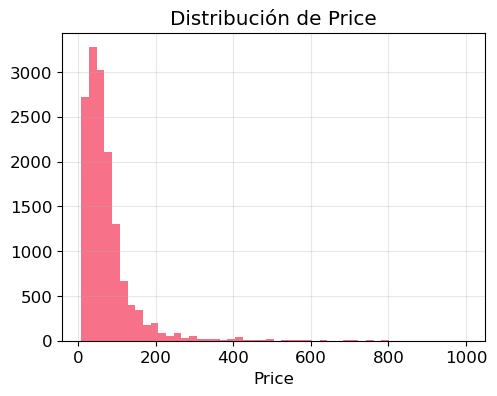

In [24]:
# Distribución variable Precio
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
airbnb_data['Price'].hist(bins=50)
plt.title('Distribución de Price')
plt.xlabel('Price')

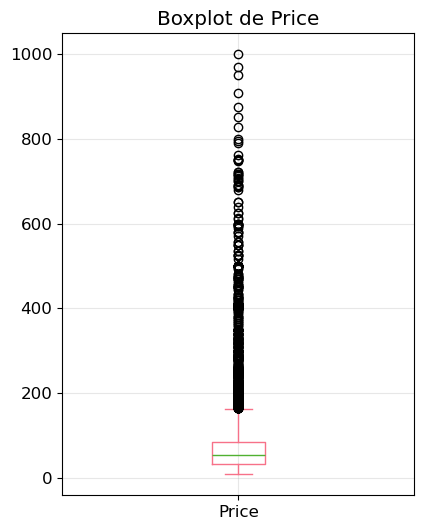

In [90]:
# Outliers
plt.subplot(1, 2, 2)
airbnb_data['Price'].plot.box()
plt.title('Boxplot de Price')
plt.show()

### 2.3 Análisis de Variables Predictoras

### Variables numéricas
- Estadísticas descriptivas
- Distribuciones

In [42]:
# Variables numéricas
numeric_cols = airbnb_data.select_dtypes(include=[np.number]).columns.tolist()
if 'Price' in numeric_cols:
    numeric_cols.remove('Price')

print(f"Variables numéricas: {len(numeric_cols)}")

for i, col in enumerate(numeric_cols):
    print(f"{i+1}. {col}")

Variables numéricas: 35
1. ID
2. Scrape ID
3. Host ID
4. Host Response Rate
5. Host Listings Count
6. Host Total Listings Count
7. Latitude
8. Longitude
9. Accommodates
10. Bathrooms
11. Bedrooms
12. Beds
13. Square Feet
14. Weekly Price
15. Monthly Price
16. Security Deposit
17. Cleaning Fee
18. Guests Included
19. Extra People
20. Minimum Nights
21. Maximum Nights
22. Availability 30
23. Availability 60
24. Availability 90
25. Availability 365
26. Number of Reviews
27. Review Scores Rating
28. Review Scores Accuracy
29. Review Scores Cleanliness
30. Review Scores Checkin
31. Review Scores Communication
32. Review Scores Location
33. Review Scores Value
34. Calculated host listings count
35. Reviews per Month


In [40]:
# Estadísticas básicas
airbnb_data[numeric_cols].describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,3590.000000,3561.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,1.343816,2.04426,390.456522,376.937883,1426.125246,189.226822,31.805341,1.589986,7.690460,3.050474,945.168742,8.954736,22.996211,39.869621,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,0.900078,1.61277,637.134930,195.701043,1246.403853,115.151070,30.878599,1.182550,12.971352,12.266517,8439.321218,9.333252,19.731371,29.621456,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.00000,0.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,1.000000,1.00000,0.000000,215.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,12.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,1.000000,2.00000,98.500000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,2.000000,2.00000,646.000000,500.000000,1725.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


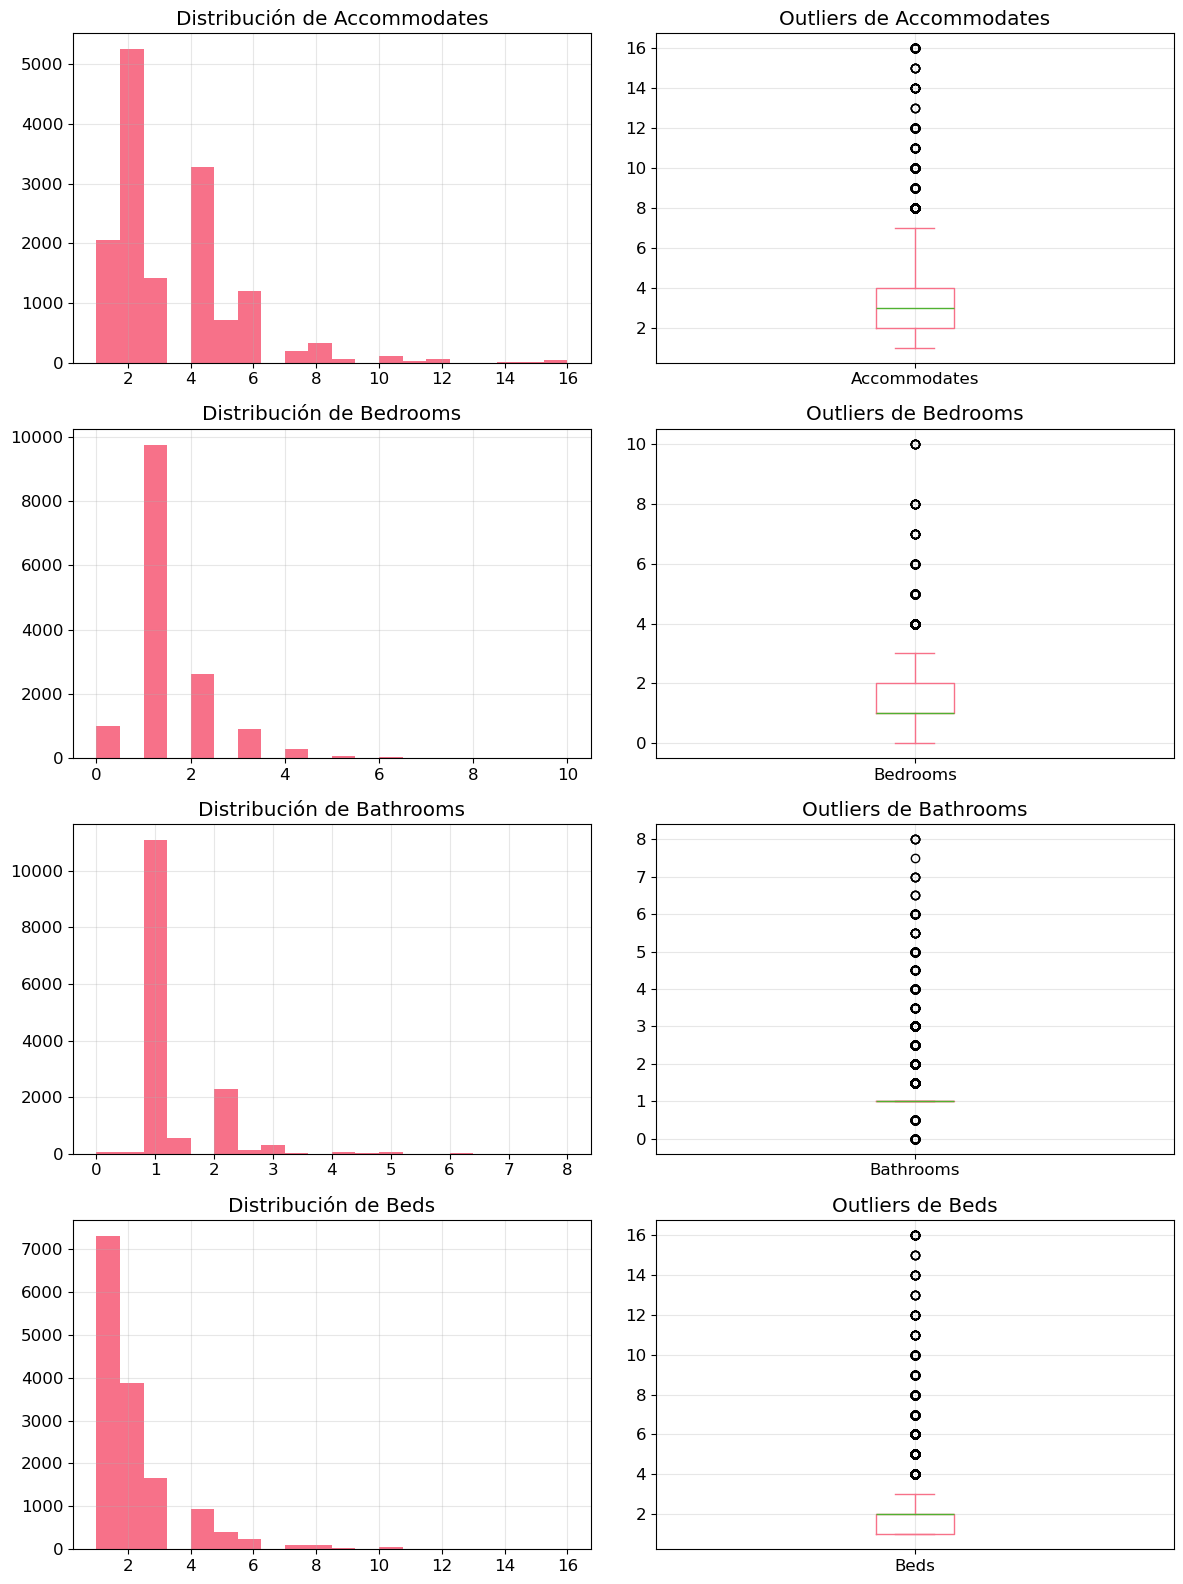

In [52]:
# Distribuciones de variables numéricas
key_numeric = ['Accommodates', 'Bedrooms', 'Bathrooms', 'Beds', 'Square Feet']
existing_cols = [col for col in key_numeric if col in airbnb_data.columns]

if existing_cols:
    n_vars = len(existing_cols[:4])  # Máximo 4 variables
    fig, axes = plt.subplots(n_vars, 2, figsize=(12, 4*n_vars))  # n_vars filas, 2 columnas
    
    # Si solo hay 1 variable, axes no es array 2D
    if n_vars == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(existing_cols[:4]):
        # Histograma
        airbnb_data[col].hist(bins=20, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribución de {col}')
        
        # Boxplot
        airbnb_data[col].plot.box(ax=axes[i, 1])
        axes[i, 1].set_title(f'Outliers de {col}')
    
    plt.tight_layout()
    plt.show()

### Variables categóricas
- Valores nulos
- Frecuencias

In [72]:
# Variables categóricas
categorical_cols = airbnb_data.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas: {len(categorical_cols)}")

# Valores únicos
vl_unicos_data = []
for col in categorical_cols:
    unique_count = airbnb_data[col].nunique()
    total_count = len(airbnb_data)
    vl_unicos_data.append({
        'Variable': col,
        'Valores_Únicos': unique_count,
        'Porcentaje': round(unique_count/total_count*100, 1)
    })

vl_unicos_df = pd.DataFrame(vl_unicos_data)
print("Cardinalidad de variables categóricas:")
vl_unicos_df

Variables categóricas: 53
Cardinalidad de variables categóricas:


,Variable,Valores_Únicos,Porcentaje
0,Listing Url,14780,100.0
1,Last Scraped,37,0.3
2,Name,14375,97.3
3,Summary,13289,89.9
4,Space,10174,68.8
5,Description,14281,96.6
6,Experiences Offered,5,0.0
7,Neighborhood Overview,7912,53.5
8,Notes,4652,31.5
9,Transit,7839,53.0


In [88]:
# Variables categóricas más relevantes
interesting_categorical = ['Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 
                          'Neighbourhood Cleansed', 'Host Response Time']
existing_cat_cols = [col for col in interesting_categorical if col in airbnb_data.columns]

print(f"Análisis de frecuencias - {len(existing_cat_cols)} variables categóricas:")

# Frecuencias
for col in existing_cat_cols:
    print(f"--- {col} ---")
    value_counts = airbnb_data[col].value_counts()
    
    freq_df = pd.DataFrame({
    'Valor': value_counts.index,
    'Frecuencia': value_counts.values,
    'Porcentaje': ((value_counts.values / len(airbnb_data)) * 100).round(1) 
    }).head(5)

    print(f"Total categorías: {len(value_counts)}\n")
    display(freq_df)
  

Análisis de frecuencias - 6 variables categóricas:
--- Property Type ---
Total categorías: 22



,Valor,Frecuencia,Porcentaje
0,Apartment,11962,80.9
1,House,1368,9.3
2,Condominium,363,2.5
3,Bed & Breakfast,353,2.4
4,Loft,305,2.1


--- Room Type ---
Total categorías: 3



,Valor,Frecuencia,Porcentaje
0,Entire home/apt,8976,60.7
1,Private room,5595,37.9
2,Shared room,209,1.4


--- Bed Type ---
Total categorías: 5



,Valor,Frecuencia,Porcentaje
0,Real Bed,14456,97.8
1,Pull-out Sofa,258,1.7
2,Futon,42,0.3
3,Couch,19,0.1
4,Airbed,5,0.0


--- Cancellation Policy ---
Total categorías: 8



,Valor,Frecuencia,Porcentaje
0,strict,5742,38.8
1,flexible,4671,31.6
2,moderate,4248,28.7
3,strict_new,34,0.2
4,super_strict_60,32,0.2


--- Neighbourhood Cleansed ---
Total categorías: 478



,Valor,Frecuencia,Porcentaje
0,Embajadores,1849,12.5
1,Universidad,1363,9.2
2,Palacio,1084,7.3
3,Sol,942,6.4
4,Justicia,789,5.3


--- Host Response Time ---
Total categorías: 4



,Valor,Frecuencia,Porcentaje
0,within an hour,7905,53.5
1,within a few hours,2872,19.4
2,within a day,1802,12.2
3,a few days or more,302,2.0


### 2.4 Calidad de Datos
- Análisis de valores faltantes
- Identificación de inconsistencias
- Evaluación de variables problemáticas -> Candidatas a eliminar

In [100]:
# Valores faltantes
missing_data = airbnb_data.isnull().sum()
missing_percent =(missing_data / len(airbnb_data)).round(4) * 100

# DataFrame para análisis
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_percent.values
}).sort_values('Missing_Percent', ascending=False)

# Missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0]
missing_df.head(15)

,Variable,Missing_Count,Missing_Percent
66,Has Availability,14768,99.92
27,Host Acceptance Rate,14741,99.74
83,Jurisdiction Names,14553,98.46
82,License,14431,97.64
55,Square Feet,14182,95.95
58,Monthly Price,11219,75.91
57,Weekly Price,11190,75.71
10,Notes,9136,61.81
59,Security Deposit,8524,57.67
13,Interaction,6554,44.34


In [94]:
# Variables con > 70% missing (candidatas a eliminar)
high_missing = missing_df[missing_df['Missing_Percent'] > 70]
print(f"Variables con >70% missing: {len(high_missing)}")
high_missing

Variables con >70% missing: 7


,Variable,Missing_Count,Missing_Percent
66,Has Availability,14768,99.918809
27,Host Acceptance Rate,14741,99.736130
83,Jurisdiction Names,14553,98.464141
82,License,14431,97.638701
55,Square Feet,14182,95.953992
58,Monthly Price,11219,75.906631
57,Weekly Price,11190,75.710419


In [102]:
# Valores inconsistentes en variables numéricas clave
print("Valores inconsistentes detectados:")

# Price: valores negativos o cero
if 'Price' in airbnb_data.columns:
    invalid_price = airbnb_data[airbnb_data['Price'] <= 0]
    print(f"Price <= 0: {len(invalid_price)} registros")

# Accommodates: valores negativos o cero
if 'Accommodates' in airbnb_data.columns:
    invalid_accommodates = airbnb_data[airbnb_data['Accommodates'] <= 0]
    print(f"Accommodates <= 0: {len(invalid_accommodates)} registros")

# Bedrooms: valores negativos
if 'Bedrooms' in airbnb_data.columns:
    invalid_bedrooms = airbnb_data[airbnb_data['Bedrooms'] < 0]
    print(f"Bedrooms < 0: {len(invalid_bedrooms)} registros")

# Bathrooms: valores negativos
if 'Bathrooms' in airbnb_data.columns:
    invalid_bathrooms = airbnb_data[airbnb_data['Bathrooms'] < 0]
    print(f"Bathrooms < 0: {len(invalid_bathrooms)} registros")

Valores inconsistentes detectados:
Price <= 0: 0 registros
Accommodates <= 0: 0 registros
Bedrooms < 0: 0 registros
Bathrooms < 0: 0 registros


In [103]:
# Rangos extremos (posibles errores)
print("\nRangos extremos detectados:")
if 'Price' in airbnb_data.columns:
    max_price = airbnb_data['Price'].max()
    extreme_price = airbnb_data[airbnb_data['Price'] > 1000]
    print(f"Price > 1000€: {len(extreme_price)} registros (máximo: {max_price})")


Rangos extremos detectados:
Price > 1000€: 0 registros (máximo: 999.0)


In [104]:
# Resumen de variables problemáticas para eliminar
vars_to_remove = []

# Variables con >70% missing
high_missing_vars = missing_df[missing_df['Missing_Percent'] > 70]['Variable'].tolist()
vars_to_remove.extend(high_missing_vars)

# Variables irrelevantes (IDs, URLs)
irrelevant_vars = ['ID', 'Listing Url', 'Scrape ID', 'Host ID', 'Host URL', 
                   'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
                   'Host Thumbnail Url', 'Host Picture Url']
existing_irrelevant = [col for col in irrelevant_vars if col in airbnb_data.columns]
vars_to_remove.extend(existing_irrelevant)

# Resumen final
print(f"Variables problemáticas identificadas: {len(set(vars_to_remove))}")
print(f"Variables con >70% missing: {len(high_missing_vars)}")
print(f"Variables irrelevantes (IDs, URLs): {len(existing_irrelevant)}")

# DataFrame resumen
problematic_df = pd.DataFrame({
    'Variable': list(set(vars_to_remove)),
    'Motivo': ['High Missing' if var in high_missing_vars else 'Irrelevant' 
               for var in set(vars_to_remove)]
})
problematic_df

Variables problemáticas identificadas: 18
Variables con >70% missing: 7
Variables irrelevantes (IDs, URLs): 11


,Variable,Motivo
0,Jurisdiction Names,High Missing
1,Listing Url,Irrelevant
2,Host Acceptance Rate,High Missing
3,Picture Url,Irrelevant
4,Host Thumbnail Url,Irrelevant
5,XL Picture Url,Irrelevant
6,Monthly Price,High Missing
7,License,High Missing
8,Has Availability,High Missing
9,ID,Irrelevant


### 2.5 Correlaciones

- Correlaciones entre variables numéricas
- Correlaciones con Price
- Matriz de correlación
- Variables más importantes

In [105]:
# Correlaciones entre variables numéricas
numeric_cols = airbnb_data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = airbnb_data[numeric_cols].corr()

# Mostrar correlaciones con Price
price_correlations = correlation_matrix['Price'].abs().sort_values(ascending=False)
price_correlations

Price                             1.000000
Weekly Price                      0.845144
Monthly Price                     0.828155
Cleaning Fee                      0.681879
Accommodates                      0.522288
Bedrooms                          0.498069
Beds                              0.442412
Square Feet                       0.421768
Security Deposit                  0.392287
Bathrooms                         0.387034
Guests Included                   0.302348
Host Total Listings Count         0.226441
Host Listings Count               0.226441
Calculated host listings count    0.222132
Extra People                      0.140037
Availability 30                   0.110298
Review Scores Location            0.100869
Reviews per Month                 0.089877
Review Scores Cleanliness         0.080247
Availability 60                   0.068205
Review Scores Rating              0.065312
Availability 365                  0.061258
Review Scores Accuracy            0.059598
Number of R

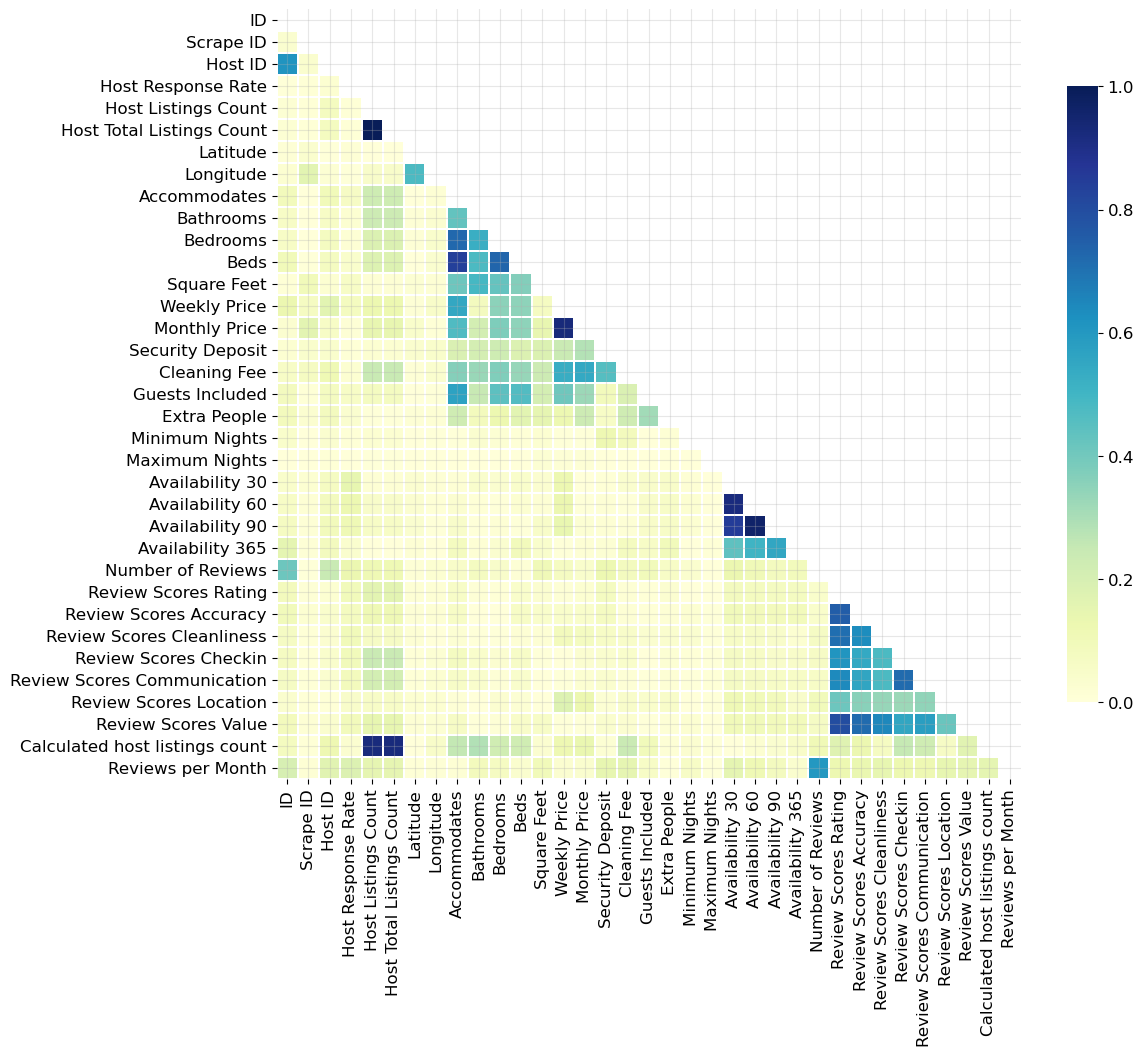

In [106]:
# Matriz de Correlation
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr(numeric_only=True))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

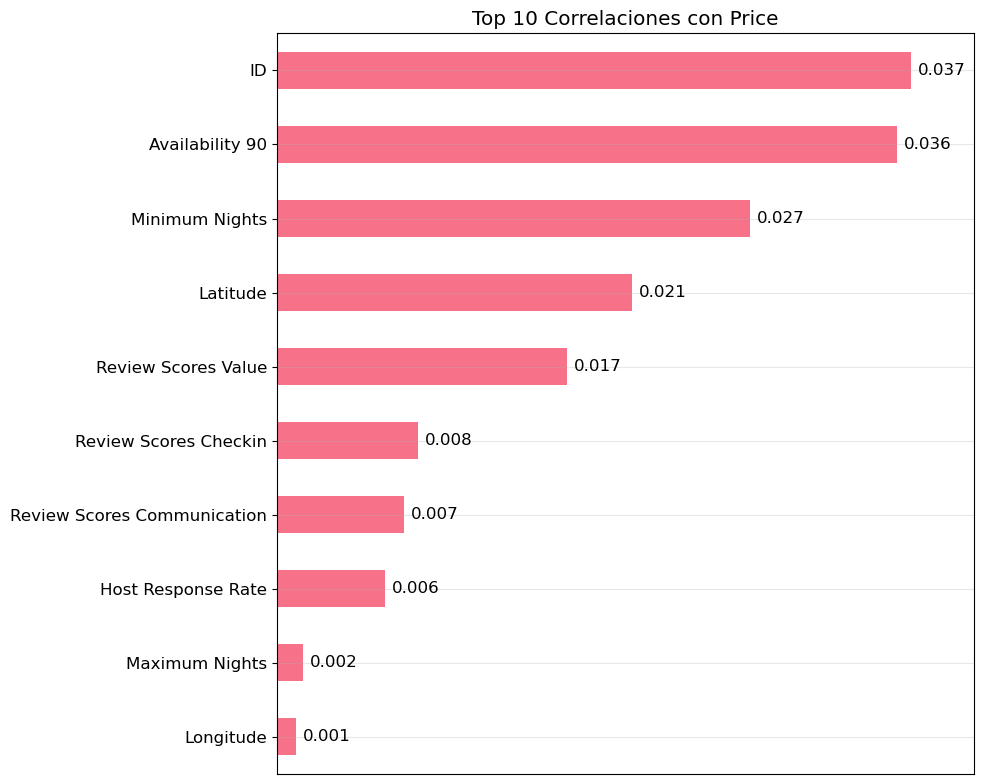

In [121]:
# Correlaciones específicas con Price (gráfico de barras)
plt.figure(figsize=(10, 8))
ax = price_correlations.head(10).plot(kind='barh')
ax.bar_label(ax.containers[0], fmt='%.3f', padding=5)
plt.title('Top 10 Correlaciones con Price')
plt.xlabel('Correlación Absoluta')

# Quitar eje X
ax.set_xlabel('')
ax.set_xticks([])

# Expandir límites para que quepan los valores
ax.set_xlim(0, price_correlations.head(10).max() * 1.10)

plt.tight_layout()
plt.show()

In [109]:
# Variables más importantes (resumen)
print("Variables más correlacionadas con Price:")
top_correlations = price_correlations.head(5)
for var, corr in top_correlations.items():
    print(f"{var}: {corr:.3f}")

print(f"\nVariables con correlación > 0.3:")
strong_correlations = price_correlations[price_correlations > 0.3]
strong_correlations

Variables más correlacionadas con Price:
Weekly Price: 0.845
Monthly Price: 0.828
Cleaning Fee: 0.682
Accommodates: 0.522
Bedrooms: 0.498

Variables con correlación > 0.3:


Weekly Price        0.845144
Monthly Price       0.828155
Cleaning Fee        0.681879
Accommodates        0.522288
Bedrooms            0.498069
Beds                0.442412
Square Feet         0.421768
Security Deposit    0.392287
Bathrooms           0.387034
Guests Included     0.302348
Name: Price, dtype: float64

## 3. División de Datos
- Train -> 80%
- Test -> 20%
- Comparación datos en train y test

In [122]:
# División datos
train_data, test_data = train_test_split(airbnb_data, test_size=0.2, random_state=42)

print(f"Train: {train_data.shape}")
print(f"Test: {test_data.shape}")

Train: (11824, 89)
Test: (2956, 89)


Distribución de Price:
Train - Media: 73.63, Mediana: 55.00
Test  - Media: 73.27, Mediana: 58.00


Text(0.5, 0, 'Price')

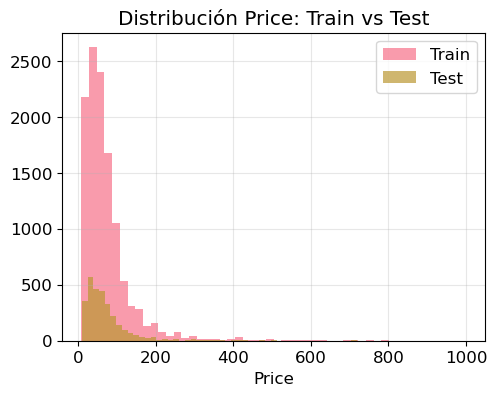

In [125]:
# Comparación datos en train y test
print("Distribución de Price:")
print(f"Train - Media: {train_data['Price'].mean():.2f}, Mediana: {train_data['Price'].median():.2f}")
print(f"Test  - Media: {test_data['Price'].mean():.2f}, Mediana: {test_data['Price'].median():.2f}")

# Histograma
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
train_data['Price'].hist(bins=50, alpha=0.7, label='Train')
test_data['Price'].hist(bins=50, alpha=0.7, label='Test')
plt.legend()
plt.title('Distribución Price: Train vs Test')
plt.xlabel('Price')

## 4. Preprocesamiento

### 4.1 Limpieza de Datos
- Eliminación de variables problemáticas o irrelevantes

In [126]:
# Eliminar variables problemáticas
train_data_clean = train_data.drop(columns=list(set(vars_to_remove)))
test_data_clean = test_data.drop(columns=list(set(vars_to_remove)))

print(f"Variables eliminadas: {len(set(vars_to_remove))}")
print(f"Train: {train_data.shape} → {train_data_clean.shape}")
print(f"Test: {test_data.shape} → {test_data_clean.shape}")

Variables eliminadas: 18
Train: (11824, 89) → (11824, 71)
Test: (2956, 89) → (2956, 71)


### 4.2 Manejo de Valores Faltantes
- Análisis de patrones de missing values
- Estrategias de imputación por tipo de variable
- Aplicación correcta (fit en train, transform en todos)

In [127]:
# Análisis de valores faltantes después de limpieza
missing_clean = train_data_clean.isnull().sum()
missing_clean = missing_clean[missing_clean > 0].sort_values(ascending=False)

print(f"Variables con missing values: {len(missing_clean)}")
missing_clean

Variables con missing values: 46


Notes                             7361
Security Deposit                  6840
Interaction                       5270
Access                            5230
Cleaning Fee                      4890
Transit                           4617
Neighborhood Overview             4556
Host About                        4223
Neighbourhood                     4190
House Rules                       4150
Space                             3153
Host Neighbourhood                3104
Review Scores Value               2685
Review Scores Location            2685
Review Scores Checkin             2682
Review Scores Accuracy            2675
Review Scores Cleanliness         2670
Review Scores Communication       2668
Review Scores Rating              2655
Last Review                       2542
Reviews per Month                 2541
First Review                      2541
Host Response Time                1538
Host Response Rate                1538
Neighbourhood Group Cleansed       793
Summary                  

### 4.3 Feature Engineering
- Creación de variables derivadas (sin data leakage)
- Transformación de variables categóricas (encoding)
- Normalización/escalado de variables numéricas
- Ingeniería de características temporales y geográficas

### 4.4 Selección de Variables
- Eliminación de variables con alta correlación
- Filtrado por importancia estadística
- Selección basada en Random Forest
- Variables finales para modelado


## 5. Modelado y Entrenamiento

### 5.1 Baseline Model
- Modelo simple de referencia (Linear Regression)
- Evaluación baseline en validation
- Establecimiento de benchmark

### 5.2 Random Forest
- Entrenamiento con hiperparámetros por defecto
- Evaluación en validation set
- Análisis de importancia de variables

### 5.3 Optimización de Hiperparámetros
- Grid Search / Random Search
- Cross-validation para selección
- Modelo optimizado final

### 5.4 Comparación de Modelos
- Evaluación de múltiples algoritmos
- Selección del mejor modelo
- Justificación de la elección

## 6. Evaluación Final

### 6.1 Evaluación en Test Set
- Predicciones en conjunto de test (una sola vez)
- Métricas finales (RMSE, MAE, R²)
- Comparación con baseline y validation

### 6.2 Análisis de Errores
- Distribución de residuos
- Identificación de patrones en errores
- Casos con mayor error de predicción
- Análisis por segmentos (tipo propiedad, ubicación)

### 6.3 Interpretabilidad del Modelo
- Variables más importantes
- Análisis de contribuciones
- Insights de negocio derivados

## 7. Conclusiones y Recomendaciones


### 7.1 Resultados Obtenidos
- Performance final del modelo
- Comparación con objetivos iniciales
- Limitaciones identificadas